## LOGISTIC REGRESSION


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import ppscore as ps
import warnings

In [2]:
# Configure environment settings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline

In [3]:
# Load the datasets
train_data_url = "https://raw.githubusercontent.com/rohitmaind/ExcelR_Assignments/main/Datasets/Titanic_train.csv"
test_data_url = "https://raw.githubusercontent.com/rohitmaind/ExcelR_Assignments/main/Datasets/Titanic_test.csv"
train_data = pd.read_csv(train_data_url)
test_data = pd.read_csv(test_data_url)

In [4]:
# Concatenate the training and testing datasets
df = pd.concat([train_data, test_data], axis=0, ignore_index=True)

In [5]:
# Display basic info about the data
df.dtypes
df.head()
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [6]:
# Drop unnecessary columns and handle missing values
df.drop(columns=['Name', 'PassengerId', 'Ticket', 'Embarked', 'Fare', 'SibSp', 'Parch'], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)


In [7]:
# Convert categorical columns into numerical columns
df = pd.get_dummies(df, columns=['Sex'], dtype=int)

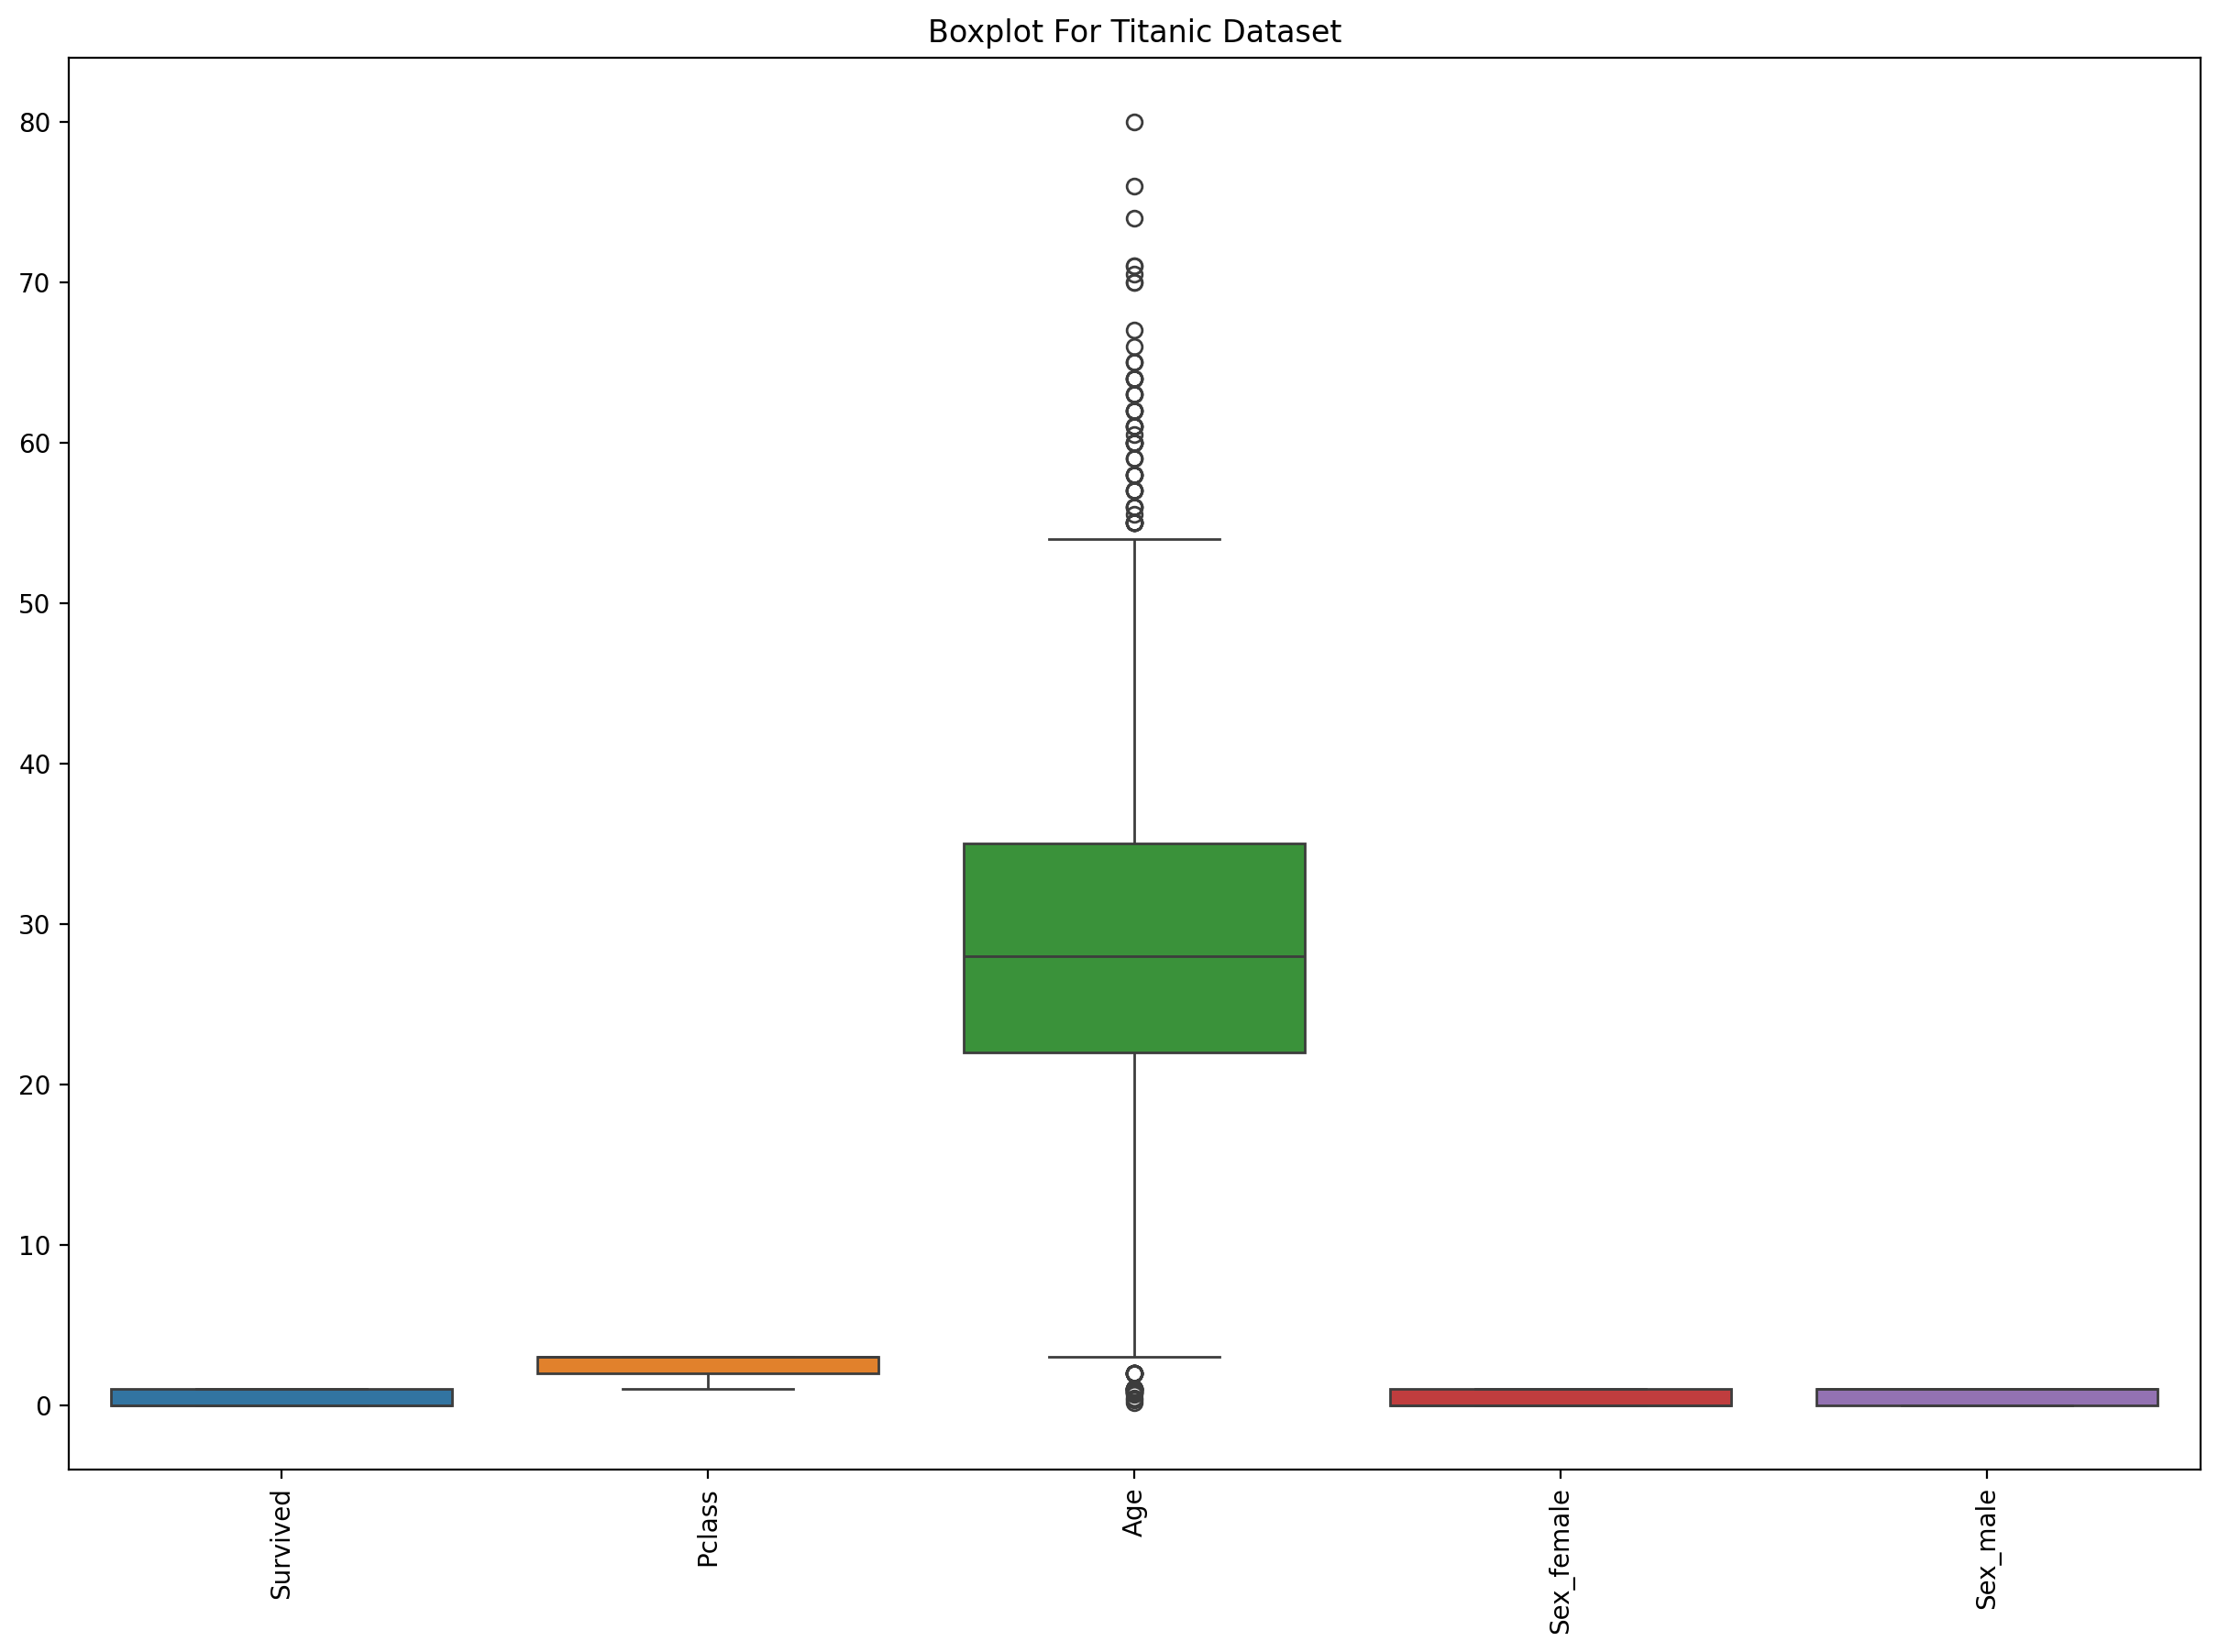

In [8]:
# Visualize outliers using boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot For Titanic Dataset")
plt.show()

In [9]:
# Outlier detection and handling
def handle_outliers(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        data[col] = np.where(data[col] > upper_bound, upper_bound, np.where(data[col] < lower_bound, lower_bound, data[col]))

handle_outliers(df, df.columns)

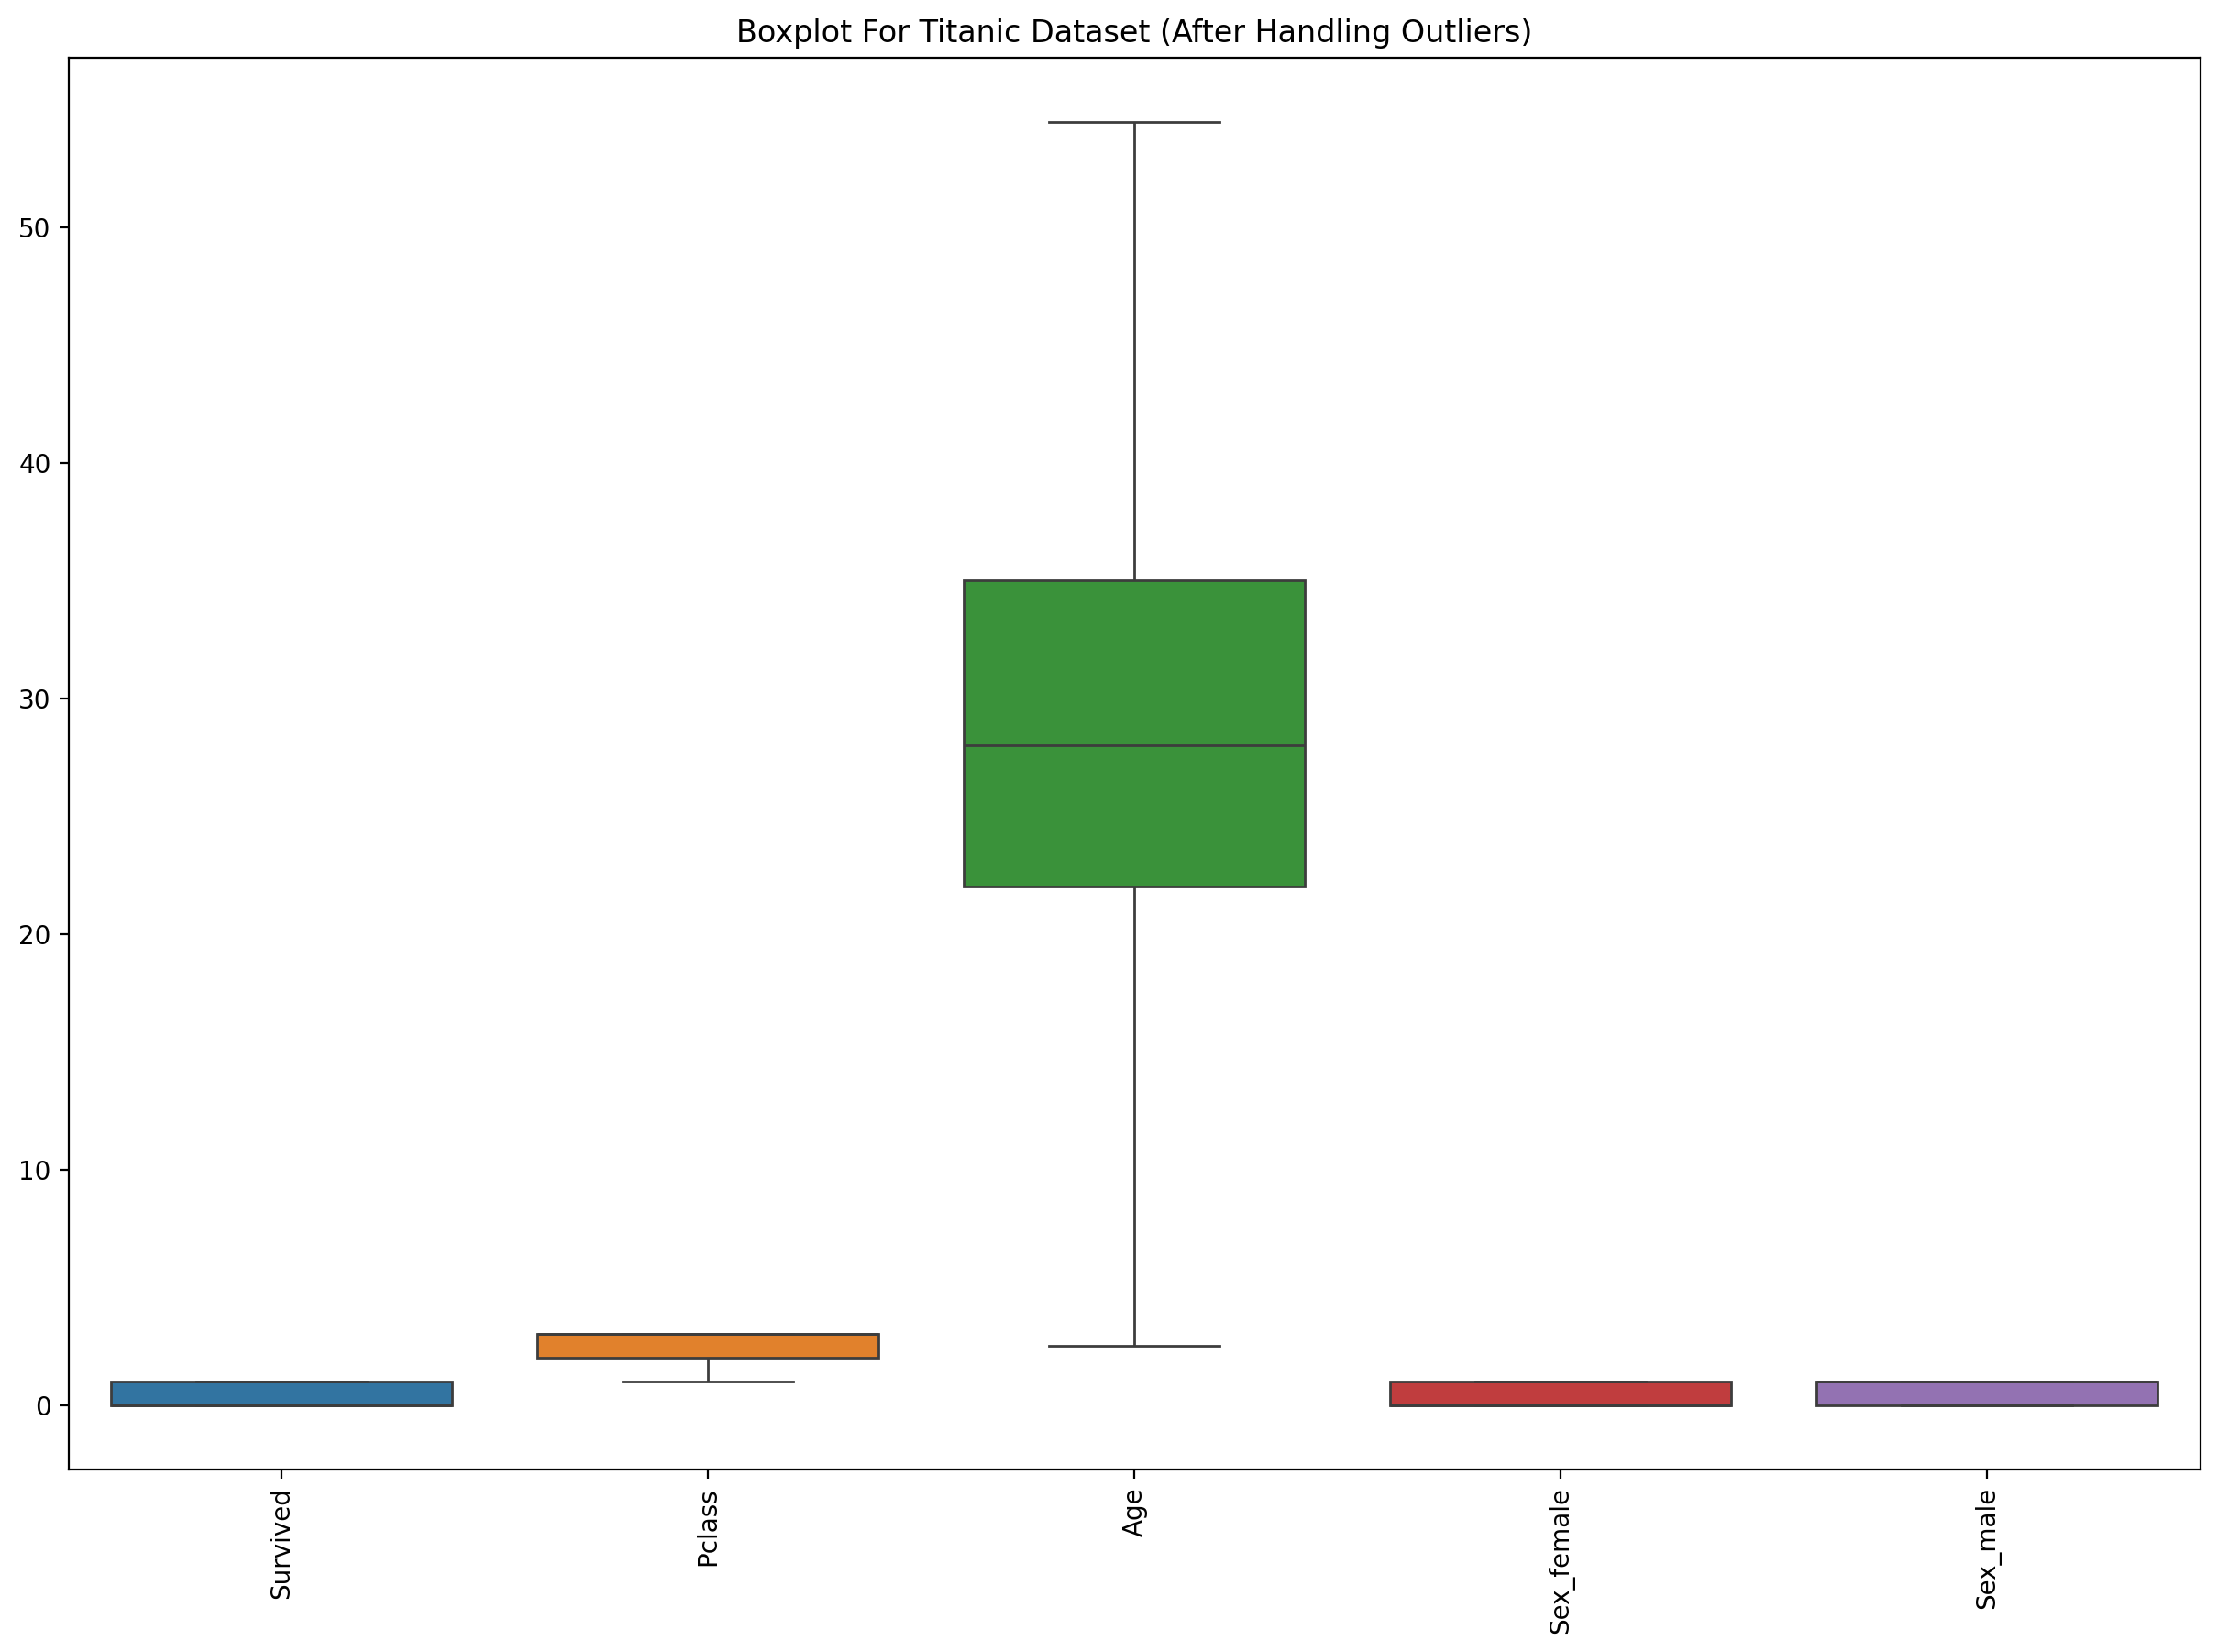

In [10]:
# Visualize outliers after handling
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot For Titanic Dataset (After Handling Outliers)")
plt.show()

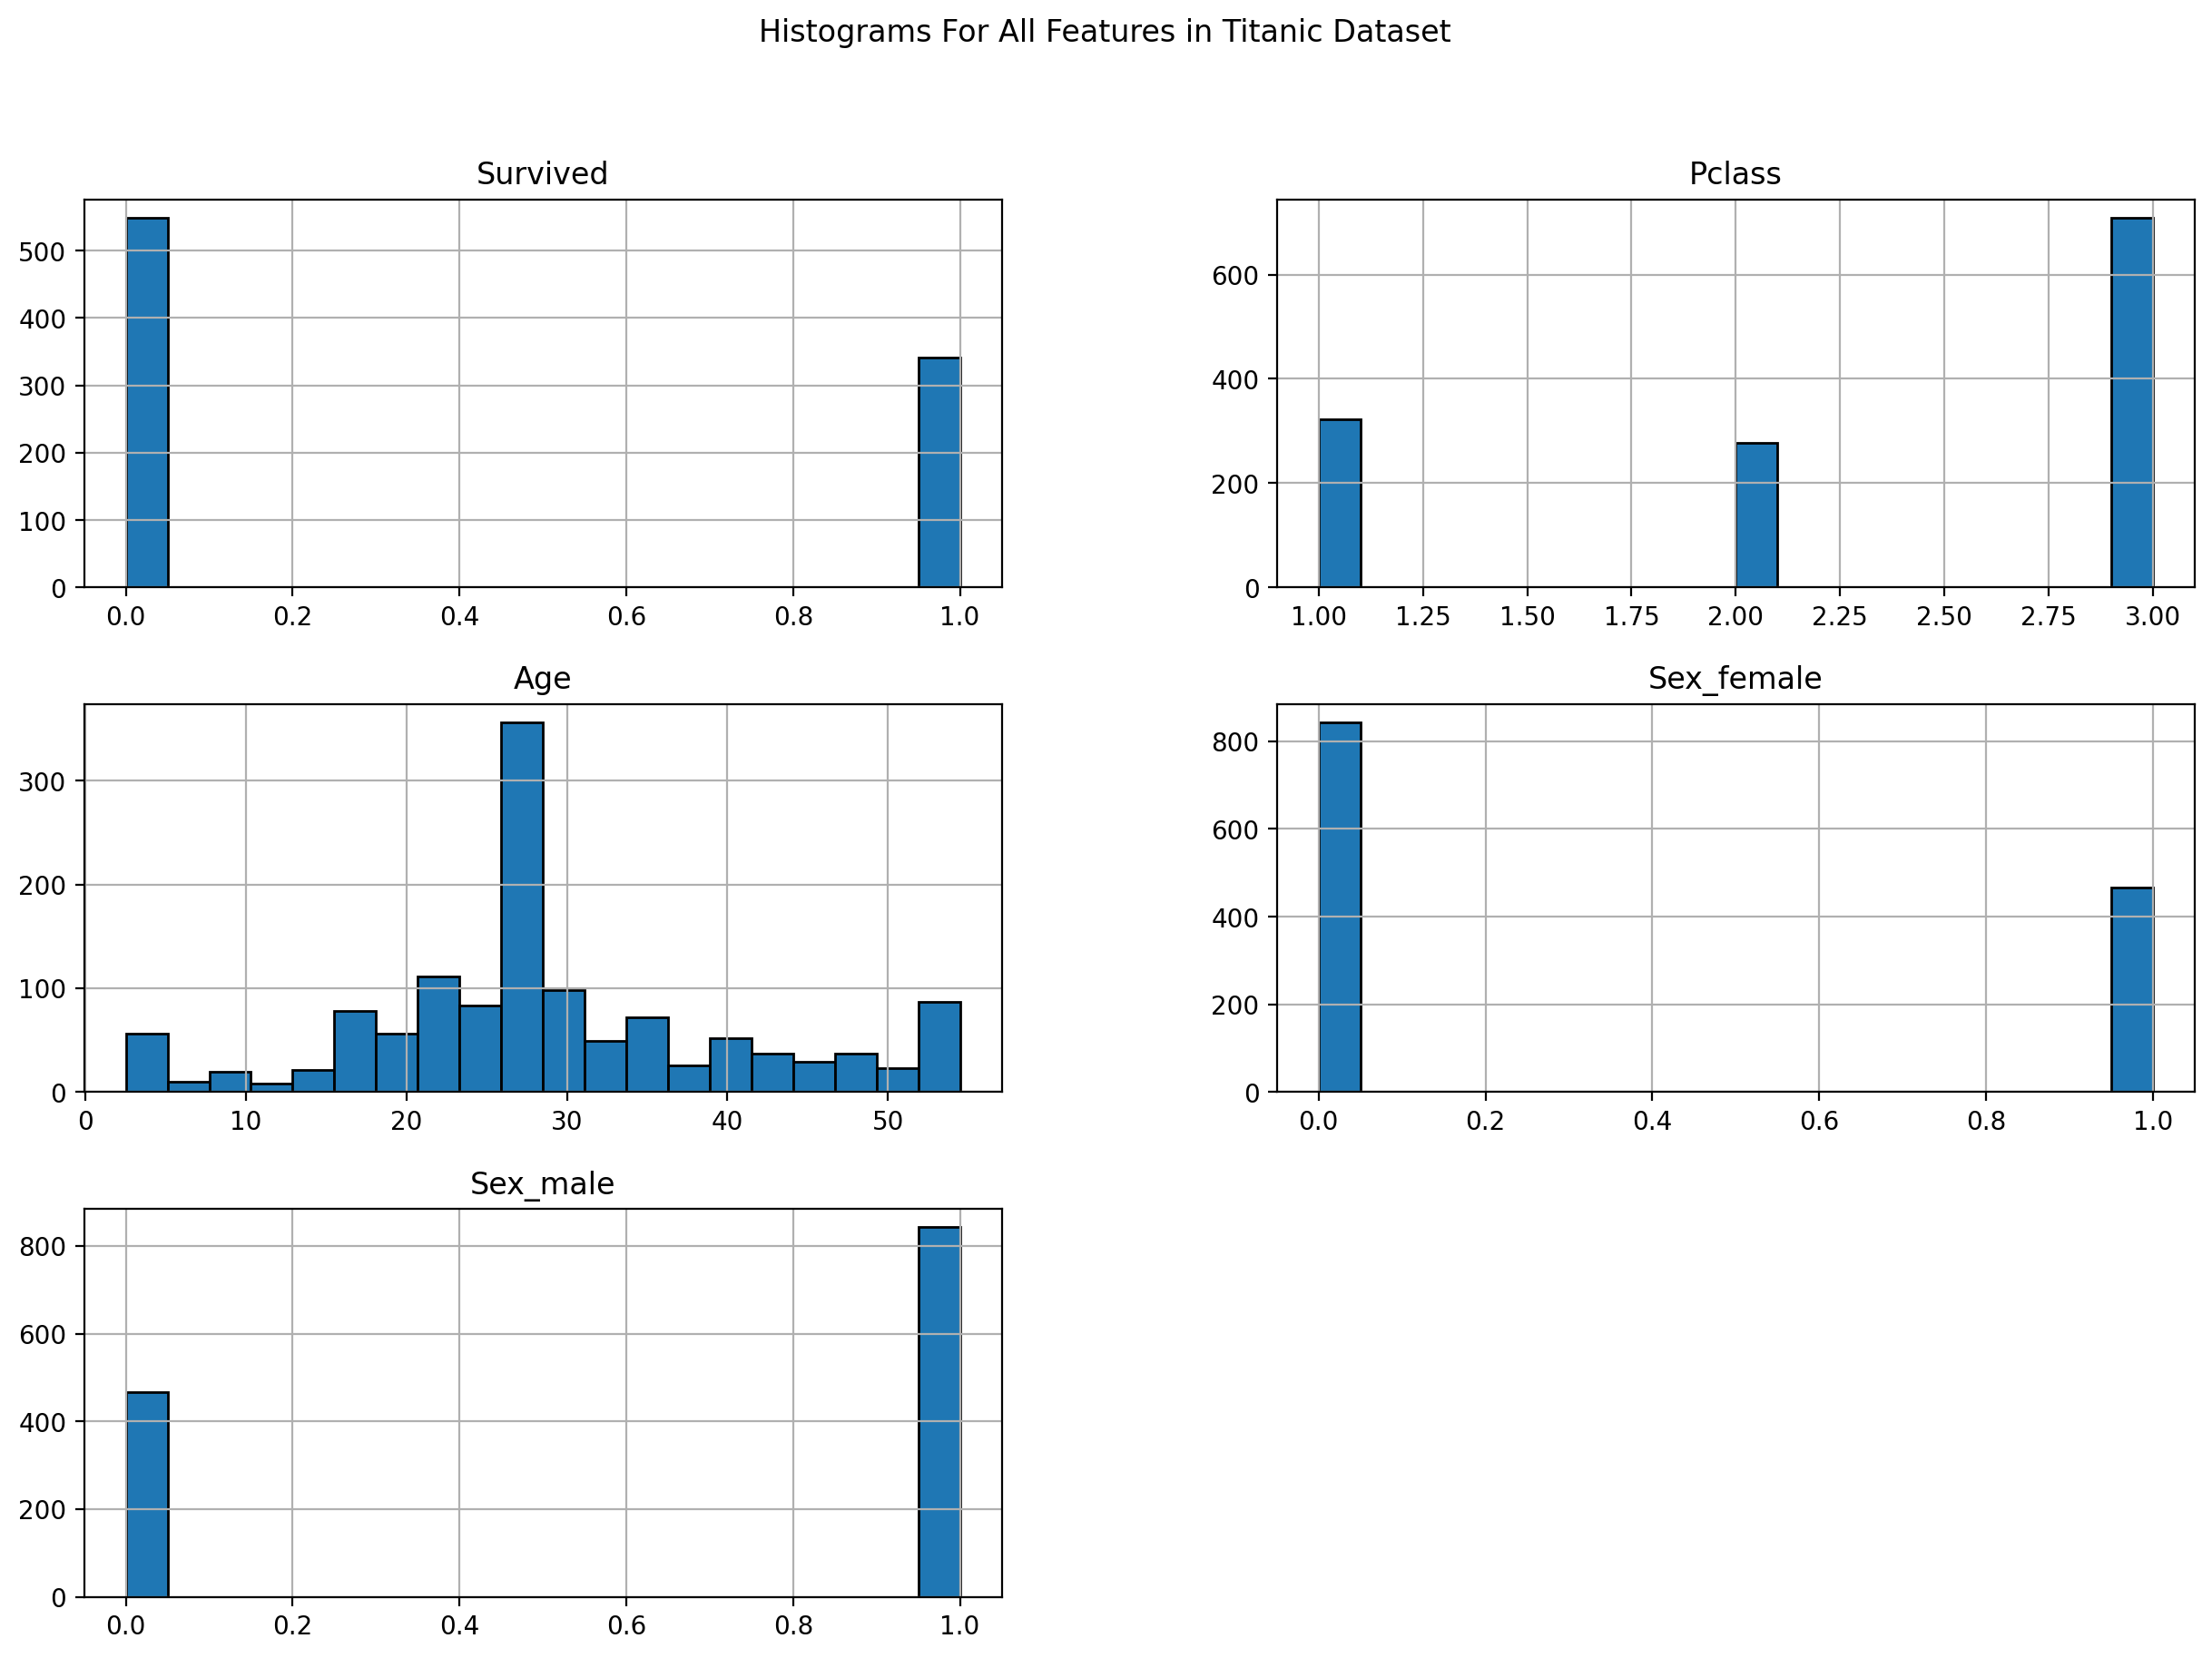

In [11]:
# Histograms for feature distribution
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms For All Features in Titanic Dataset")
plt.show()

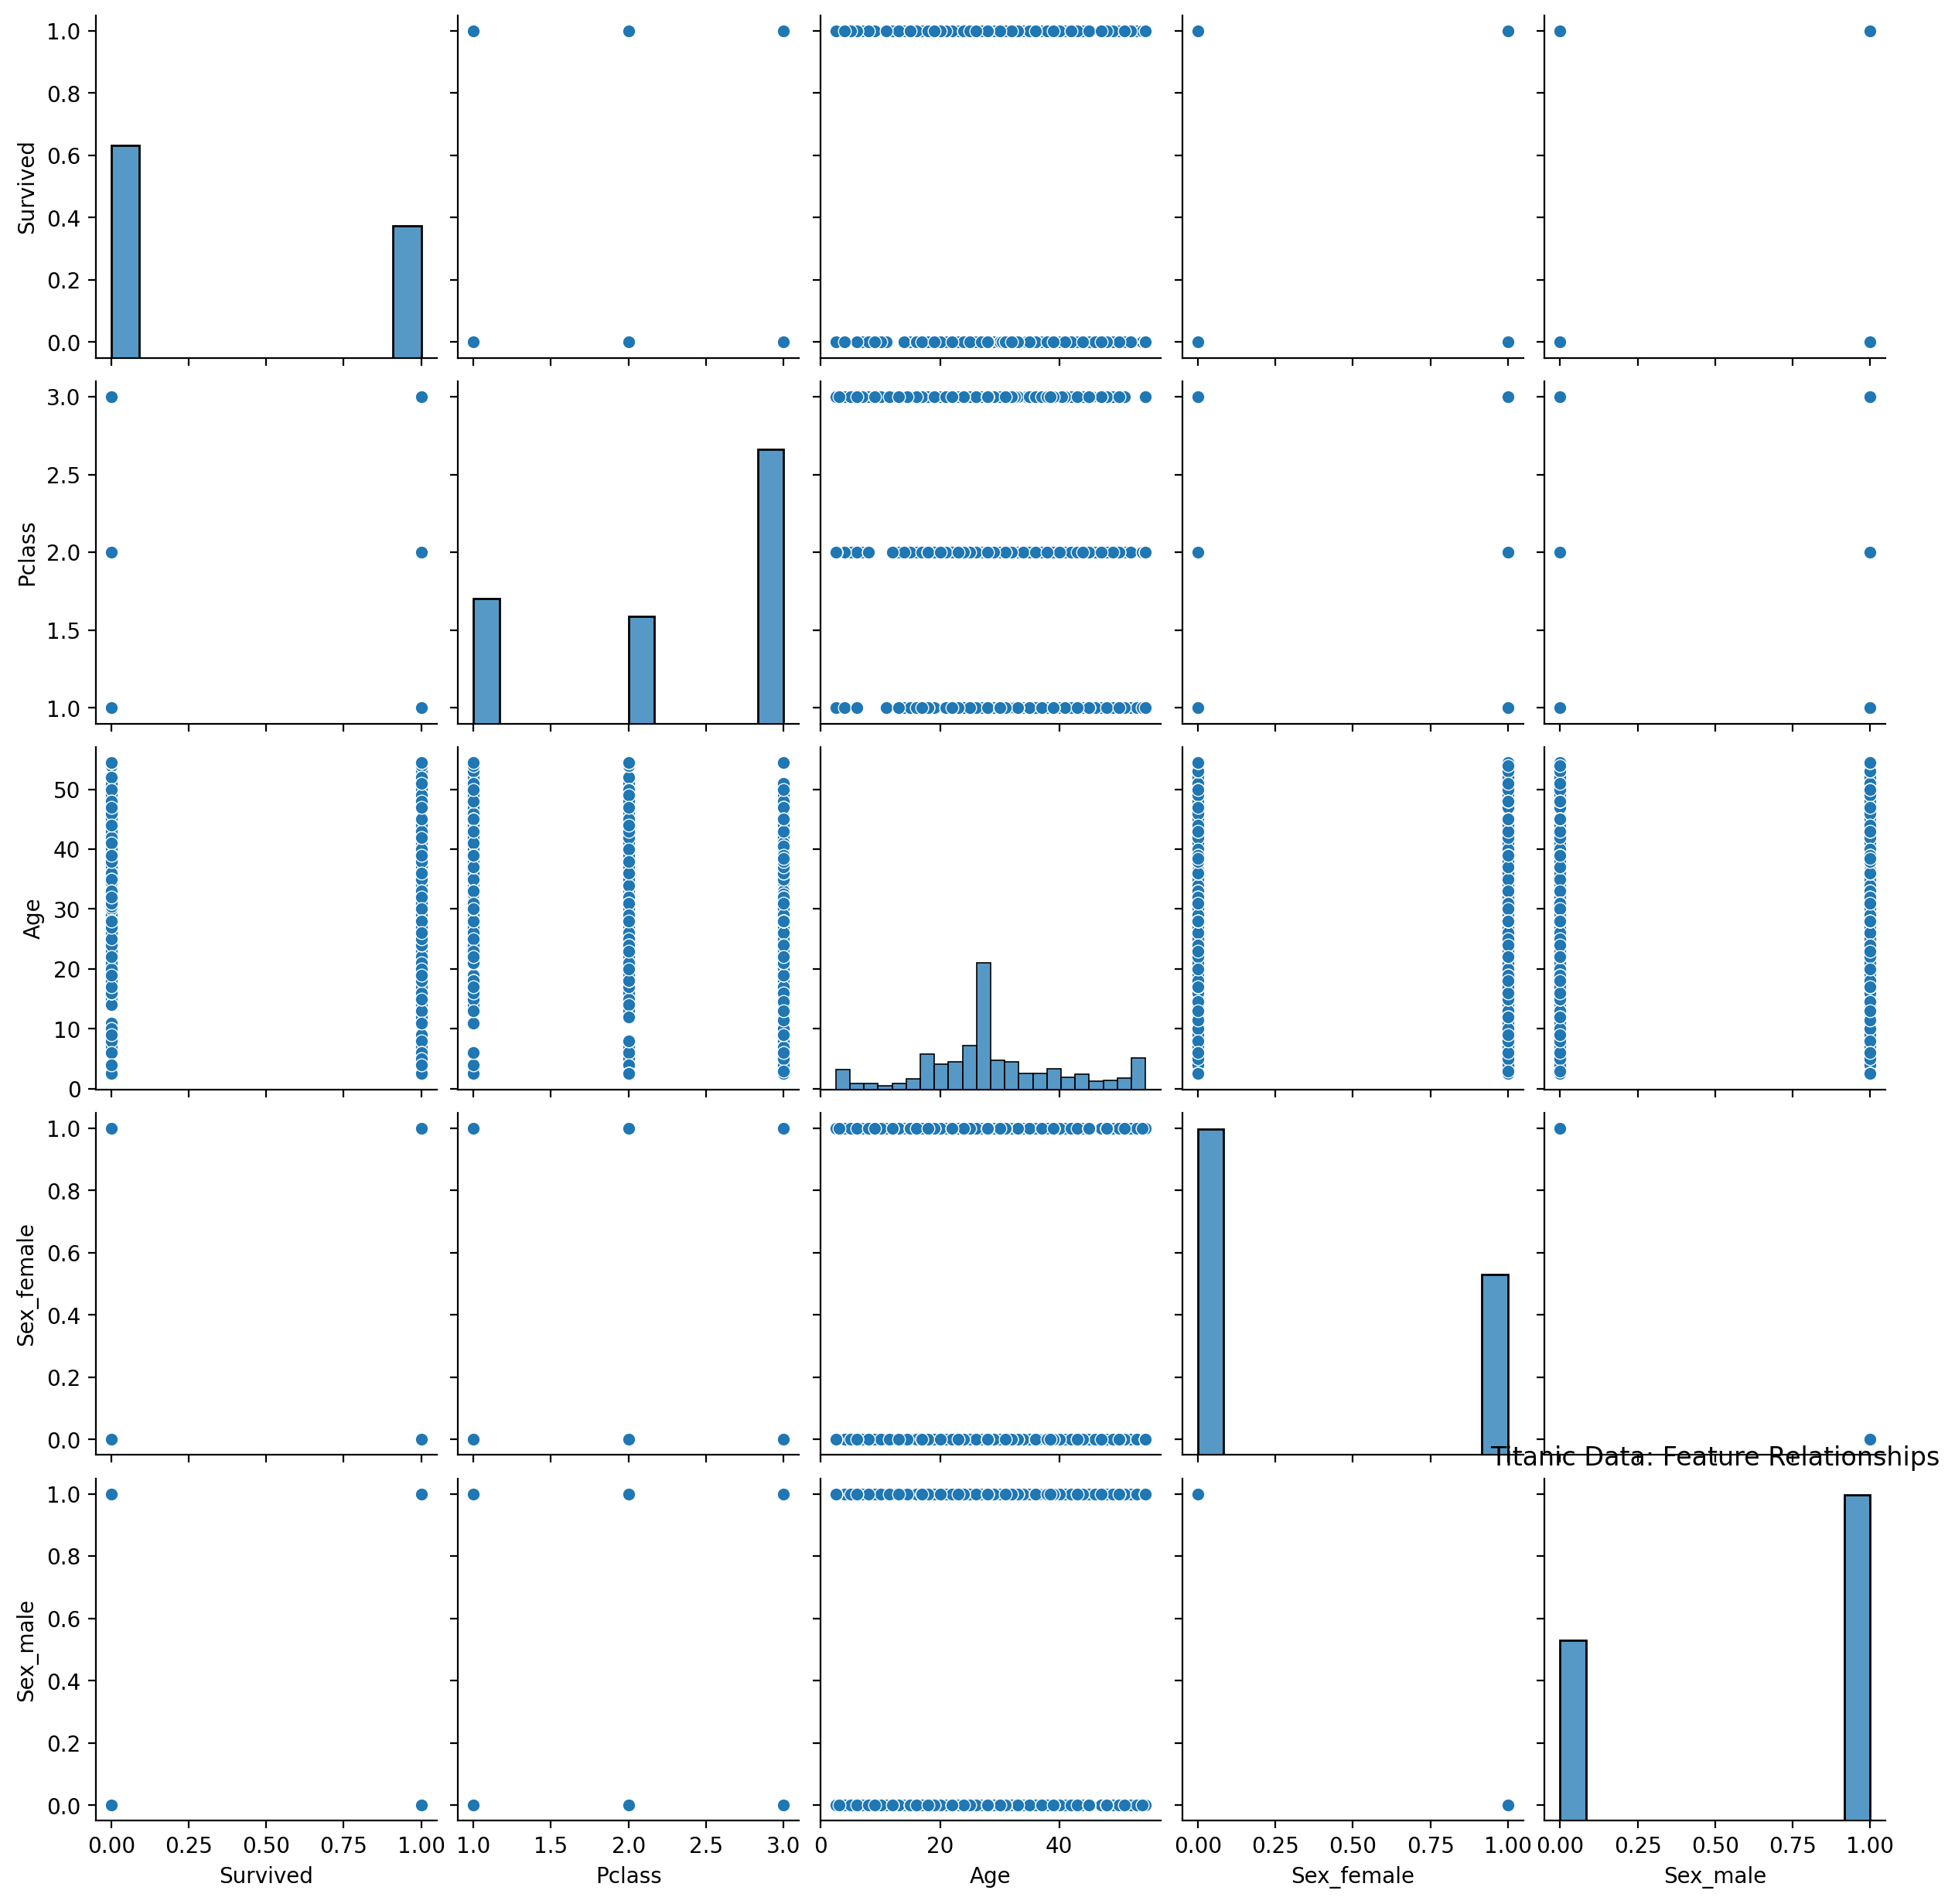

In [12]:
# Pairplot to visualize relationships between features
sns.pairplot(df)
plt.title("Titanic Data: Feature Relationships")
plt.show()


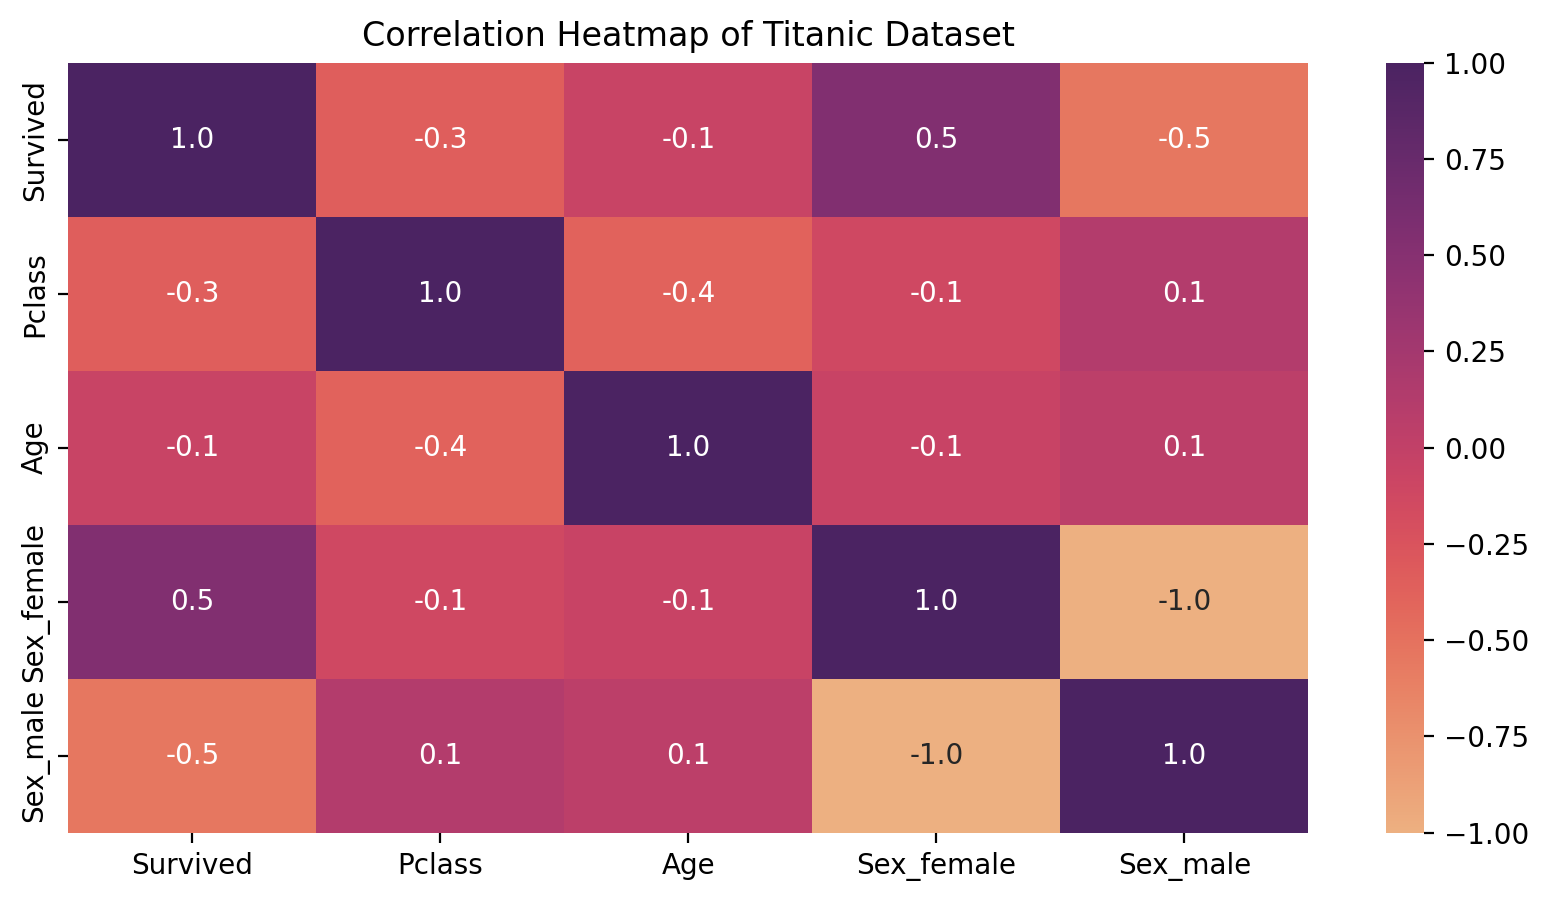

In [13]:
# Correlation matrix and heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), cbar=True, cmap='flare', annot=True, fmt='.1f', center=0)
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()

In [14]:
# Standardize the data
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [15]:
# Split the data back into training and testing sets
train_new = df.iloc[:len(train_data)]
test_new = df.iloc[len(train_data):]

In [16]:
# Add the 'Survived' column back to the training set
train_new['Survived'] = train_data['Survived']

In [17]:
# Split the data into features (X) and target (y)
x_train = train_new.drop(columns=['Survived'])
y_train = train_new['Survived']
x_test = test_new

In [20]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [24]:
# Ensure the 'Survived' column is not included in the test set
x_test = test_new.drop(columns=['Survived'], errors='ignore')

# Predict on the test data
y_pred = model.predict(x_test)

# Calculate and print accuracy scores
train_accuracy = model.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy}")


Training Accuracy: 0.8002244668911336


In [25]:
# Predict on the test data
y_pred = model.predict(x_test)


In [26]:

# Calculate and print accuracy scores
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Predicted Accuracy: {test_accuracy}")


Training Accuracy: 0.8002244668911336
Predicted Accuracy: 1.0


### Interview Questions:
#### 1. What is the difference between precision and recall?
**Precision**: The percentage of correctly predicted positive instances out of all instances predicted as positive. It measures the accuracy of positive predictions.

**Recall**: The percentage of correctly predicted positive instances out of all actual positive instances. It measures how well the model captures all the positive cases.



#### 2. What is cross-validation, and why is it important in binary classification?
**Cross-validation**: A technique where the dataset is divided into multiple subsets (folds). The model is trained on some folds and tested on the remaining ones, rotating through all folds.

**Importance in Binary Classification**:
- **Reduces Overfitting**: Ensures the model generalizes well across different subsets of data.
- **Provides Robust Evaluation**: Offers a more reliable estimate of model performance by averaging results from multiple test sets.

## **Conclusion**:

In this logistic regression workflow for the Titanic dataset, we performed comprehensive data preprocessing, including handling missing values, encoding categorical variables, and standardizing features. Outliers were detected and managed to ensure robust model performance. Data visualizations, such as boxplots and heatmaps, provided insights into the distribution and relationships between features.

The Logistic Regression model was trained on the processed data, achieving a training accuracy of approximately 80%. However, since the true labels for the test data are not provided, the accuracy of the model on the test set could not be computed. The overall approach demonstrated effective data preparation and model training, setting a solid foundation for further analysis and model evaluation.